## Titanic: Machine Learning from Disaster
##### Use machine learning to create a model which predicts passengers that will survive the Titanic shipwreck

In [1]:
# import libraries

# For loading Packages
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# To build and evaluate model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# store train and test dataset in a dataframe
train_df = pd.read_csv("train_titanic.csv")
test_df = pd.read_csv("test_titanic.csv")

In [3]:
# View train dataset 
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# View test dataset 
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Exploratory Data Analysis

In [5]:
# print shape of the train dataset
train_df.shape

(891, 12)

In [6]:
# print information about the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Univariate Analysis

In [7]:
# get unique values of the Survived column
train_df["Survived"].unique()

array([0, 1], dtype=int64)

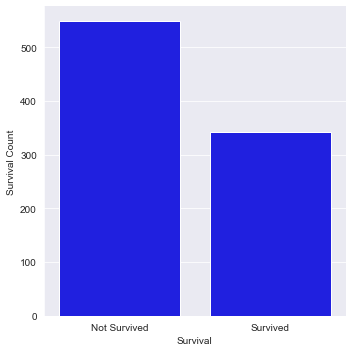

In [8]:
# Visualize target variable
train_df["Survived_cat"] = train_df["Survived"].map({1: "Survived", 0: "Not Survived"})
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("Survival", "Survival Count")

It can be inferred from the plot above that the number of passengers that survived in the train dataset is less than those that did not

In [9]:
# get unique values of the Pclass column
train_df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

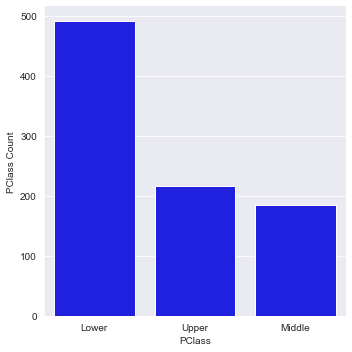

In [10]:
# Visualize Pclass variable
train_df["Pclass_cat"] = train_df["Pclass"].map({1: "Upper", 2: "Middle", 3: "Lower"})
ax = sns.catplot(x = "Pclass_cat", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("PClass", "PClass Count")

It can be inferred from the plot above that most passengers in the train dataset are lower class

In [11]:
# get unique values of the Sex column
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

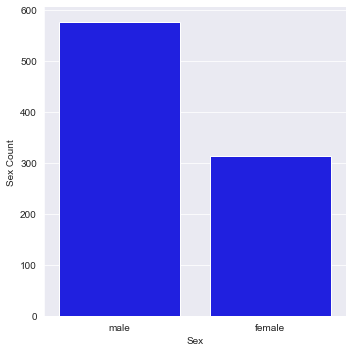

In [12]:
# Visualize Sex variable
ax = sns.catplot(x = "Sex", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("Sex", "Sex Count")

It can be inferred from the train dataset that there were more male passengers than female in the train dataset

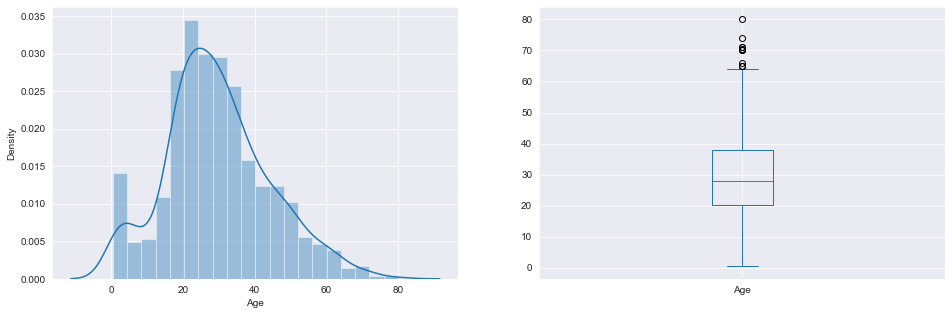

In [13]:
# Visualize Age variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Age']);
plt.subplot(122)
train_df['Age'].plot.box(figsize = (16, 5));
plt.show()

It can be seen from the graph that the distribution of the Age variable is fairly normal and some outliers are present 

In [14]:
# get unique values of the SibSp column
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

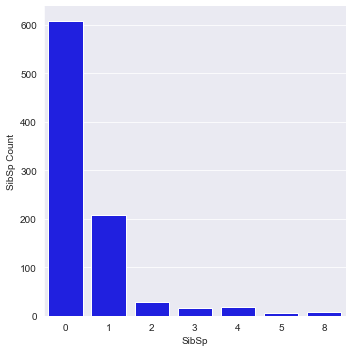

In [15]:
# Visualize SibSp variable
ax = sns.catplot(x = "SibSp", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("SibSp", "SibSp Count")

It can be inferred from the plot above that most passengers in the train dataset were either alone or had 1 sibling/spouse aboard

In [16]:
# get unique values of the Parch column
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

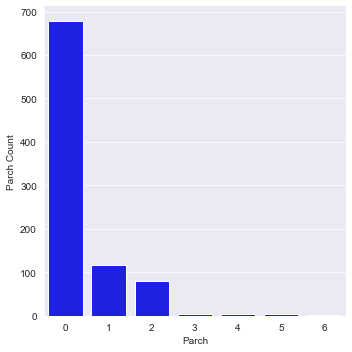

In [17]:
# Visualize Parch variable
ax = sns.catplot(x = "Parch", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("Parch", "Parch Count")

It can be inferred from the plot above that most passengers in the train dataset were either alone or had 1 parent/child aboard the Titanic

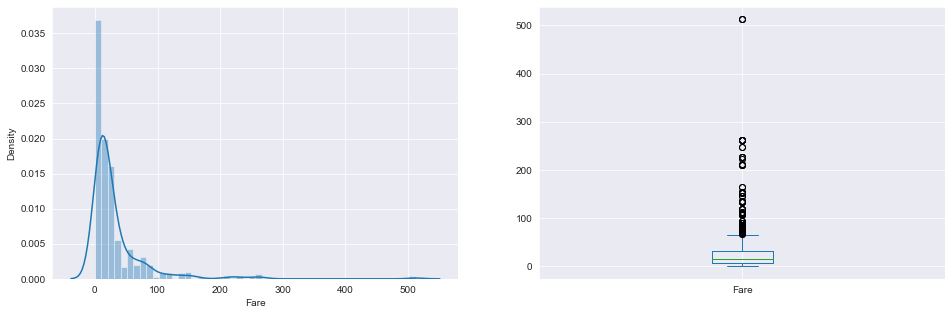

In [18]:
# Visualize Fare variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Fare']);
plt.subplot(122)
train_df['Fare'].plot.box(figsize = (16, 5));
plt.show()

It can be seen from the graph that the Fare feature has a lot outliers and is left skewed

In [19]:
# get unique values of the Cabin column
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
# Extract Cabin_cat feature from Cabin column
train_df["Cabin_cat"] = train_df["Cabin"].str[:1]

# get unique values of the Cabin_cat column
train_df["Cabin_cat"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

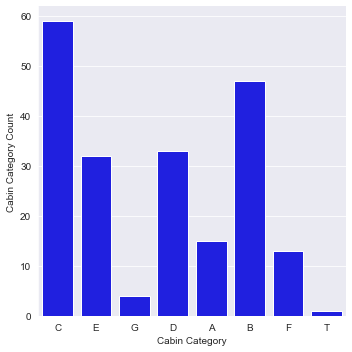

In [21]:
# Visualize Cabin_cat variable
ax = sns.catplot(x = "Cabin_cat", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("Cabin Category", "Cabin Category Count")

It can be seen that the most common Cabin catgory in the train dataset is C

In [22]:
# get unique values of the Embarked column
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

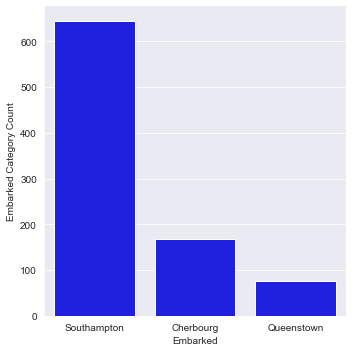

In [23]:
# Visualize Embarked variable
train_df["Embarked_cat"] = train_df["Embarked"].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
ax = sns.catplot(x = "Embarked_cat", data = train_df, kind = "count", color = "b")
ax.set_axis_labels("Embarked", "Embarked Category Count")

It can be seen that most passengers in the train dataset embarked in the Southampton port

##### Bivariate Analysis

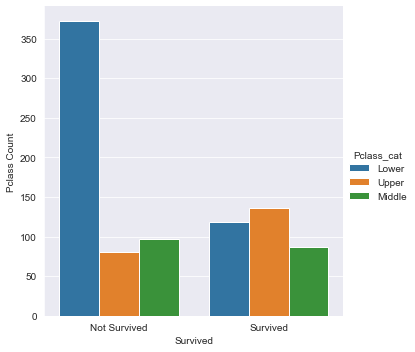

In [24]:
# Pclass feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Pclass_cat")
ax.set_axis_labels("Survived", "Pclass Count")

It can be inferred from the plot above that:
* most lower class passengers in the train dataset did not survive
* more middle class passengers in the train dataset did not survive compared to those who did
* more higher class passengers in the train dataset survived compared to those who did not

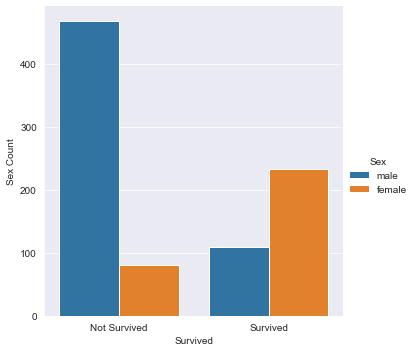

In [25]:
# Sex feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Sex")
ax.set_axis_labels("Survived", "Sex Count")

It can be inferred from the plot above that:
* the no of female passengers that survived in the train dataset is higher that those that did not
* the no of male passengers that survived in the train dataset is lower that those that did not

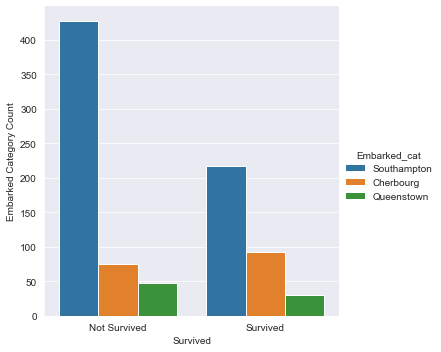

In [26]:
# Embarked_cat feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Embarked_cat")
ax.set_axis_labels("Survived", "Embarked Category Count")

It can be inferred from the plot above that:
* the no of passengers that embarked in Southampton that did not survive is more that those that did
* the no of passengers that embarked in Cherbourg that did not survive is less that those that did
* the no of passengers that embarked in Southampton that did not survive is more that those that did

<AxesSubplot:xlabel='Survived', ylabel='Age'>

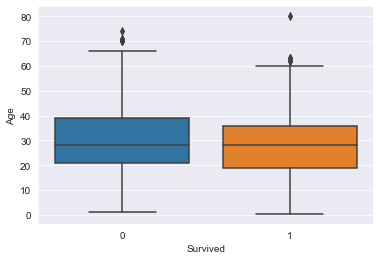

In [27]:
# Age feature vs Survived
sns.boxplot(data = train_df, x = "Survived", y = "Age")

It looks like younger passengers survived more than the older ones

In [28]:
# Create an age category column to confirm that younger passengers survived more than the older ones
train_df["Age_cat"] = pd.cut(train_df.Age, bins = [0, 15, 50, 81], labels = ['0 - 15','16 - 50', '51 - 81'])

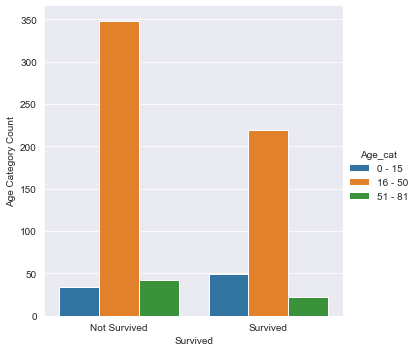

In [29]:
# Age_cat feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Age_cat")
ax.set_axis_labels("Survived", "Age Category Count")

It can be inferred from the plot above that the number of passengers that fall between age 0 - 15 survived more than the numbers that did not

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

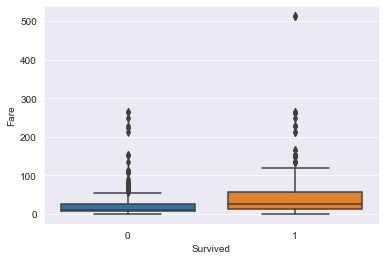

In [30]:
# Fare variable vs Survived variable
sns.boxplot(data = train_df, x = "Survived", y = "Fare")

There are quite a number of outliers in the fare category but it looks like passengers that paid above 50 survived more than those that paid less

In [31]:
# Create a fare category to confirm that the no of passengers that paidabove 50 survived more
train_df["Fare_cat"] = pd.cut(train_df.Fare, bins = [0, 50, 150, 512.3292], labels = ['poor', 'middle', 'rich'])

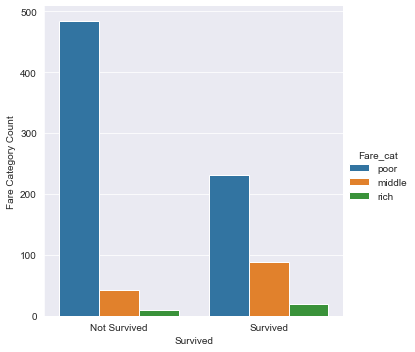

In [32]:
# Fare_cat feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Fare_cat")
ax.set_axis_labels("Survived", "Fare Category Count")

It can be inferred from the graph above that the middle class and rich survived more than the poor passengers

<AxesSubplot:xlabel='Pclass_cat', ylabel='Fare'>

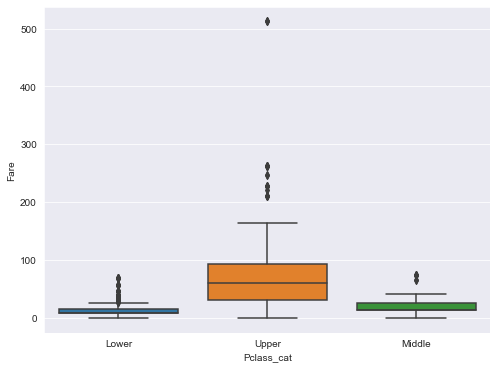

In [33]:
# Fare variable vs Pclass_cat variable
plt.figure(figsize = (8, 6))
sns.boxplot(x = "Pclass_cat", y = "Fare", data = train_df)

It can be inferred from the plot above that Upper class passengers paid more than lower and middle class passengers

<AxesSubplot:xlabel='Pclass_cat', ylabel='Age'>

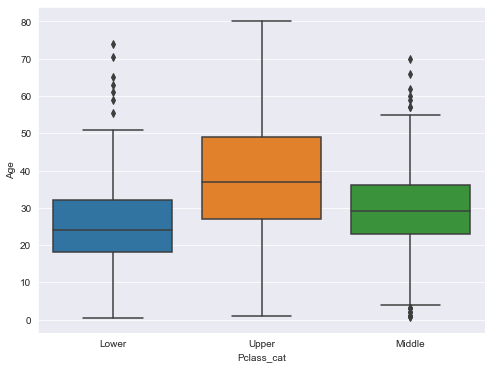

In [34]:
# Age variable vs Pclass_cat variable
plt.figure(figsize = (8, 6))
sns.boxplot(x = "Pclass_cat", y = "Age", data = train_df)

From the plot above it can inferred that Upper class people are older than Middle and Lower class passengers

In [35]:
# Create Family size column by adding SibSp and Parch column
train_df["Family_size"] = train_df["SibSp"] + train_df["Parch"] + 1

# Create is_alone column (i.e 0 if passenger is alone aboard, 1 if passenger is with siblings/spouses/parents/children)
train_df["is_alone"] = False
train_df.loc[train_df["Family_size"] == 1, "is_alone"] = True

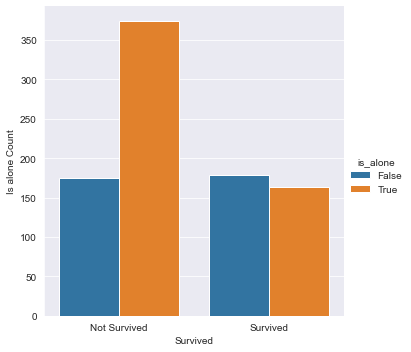

In [36]:
# is_alone feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "is_alone")
ax.set_axis_labels("Survived", "Is alone Count")

It looks like those the passengers that were not alone had a slight higher chance of survival

In [37]:
# Extract Title feature from Name feature
train_df["Title"] = (train_df["Name"].str.split('.', n = 3, expand = True)[0]).str.split(',', expand = True)[1]
train_df["Title"] = train_df["Title"].str.replace('Mlle|Miss', 'Miss')
train_df["Title"] = train_df["Title"].str.replace('Ms|Mme|Mrs', 'Mrs')
train_df["Title"] = train_df["Title"].str.replace('Master|Mr|Rev|Dr', 'Mr')
train_df["Title"] = train_df["Title"].str.replace('the Countess|Lady|Sir|Don|Jonkheer', 'Royality')
train_df["Title"] = train_df["Title"].str.replace('Capt|Col|Major', 'Officer')

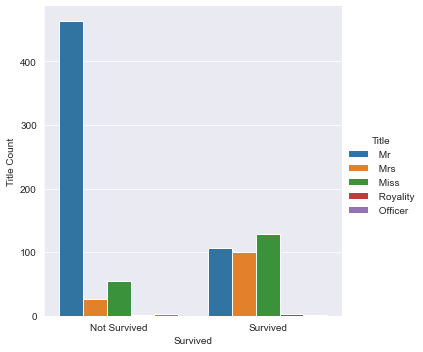

In [38]:
# Title feature vs Survived
ax = sns.catplot(x = "Survived_cat", data = train_df, kind = "count", hue = "Title")
ax.set_axis_labels("Survived", "Title Count")

It can be inferred from the plot that females survived more than males

In [39]:
# drop the columns created during EDA
cols = ["Survived_cat", "Pclass_cat", "Cabin_cat", "Embarked_cat", "Age_cat", "Fare_cat", "Family_size", "is_alone", "Title"]
for col in cols:
    train_df = train_df.drop(col, axis = 1)

#### Cleaning and Preprocessing

In [40]:
# Combine train and test data to make cleaning and preprocessing easier
target = train_df["Survived"]
test_id = test_df["PassengerId"]

train_df_1 = train_df.drop(["PassengerId", "Survived"], axis = 1)
test_df_1 = test_df.drop("PassengerId", axis = 1)

data = pd.concat([train_df_1, test_df_1], axis = 0).reset_index(drop = True)

In [41]:
# view first 5 rows of data
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# print information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


In [43]:
# drop Cabin column because more than 50% of its values are missing
data_1 = data.copy()
data_1 = data_1.drop("Cabin", axis = 1)

In [44]:
## Fill missing values for numeric columns
data_2 = data_1.copy()

# get numeric columns with missing values and store in missing_num_cols
missing_num_cols = list(data_2.select_dtypes(np.number).loc[:, data_2.isna().sum() > 0].columns)
missing_num_cols

['Age', 'Fare']

In [45]:
# print description of the data in Age and Fare
data_2[missing_num_cols].describe()

,Age,Fare
count,1046.000000,1308.000000
mean,29.881138,33.295479
std,14.413493,51.758668
min,0.170000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


In [46]:
# Fill Age column with mean
data_2['Age'] = data_2['Age'].fillna(data_2['Age'].mean())

# Fill Fare column with median
data_2['Fare'] = data_2['Fare'].fillna(data_2['Fare'].median())

In [47]:
data_2.select_dtypes(np.number).isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [48]:
# get categorical columns with missing values and store in missing_cat_cols
missing_cat_columns = list(data_2.select_dtypes('object').loc[:, data_2.isna().sum() > 0].columns)
missing_cat_columns

['Embarked']

In [49]:
# print description of the data in Embarked
data_2['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [50]:
# Fill Embarked column with mode
data_2['Embarked'] = data_2['Embarked'].fillna(data_2['Embarked'].mode()[0])

In [51]:
data_2.select_dtypes('object').isna().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

#### Feature Engineering

In [52]:
data_3 = data_2.copy()

In [53]:
data_3.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
# Create Title feature from Name feature
data_3["Title"] = (data_3["Name"].str.split('.', n = 3, expand = True)[0]).str.split(',', expand = True)[1]
data_3["Title"] = data_3["Title"].str.replace('Mlle|Miss', 'Miss')
data_3["Title"] = data_3["Title"].str.replace('Ms|Mme|Mrs', 'Mrs')
data_3["Title"] = data_3["Title"].str.replace('Master|Mr|Rev|Dr', 'Mr')
data_3["Title"] = data_3["Title"].str.replace('the Countess|Lady|Sir|Don|Jonkheer', 'Royality')
data_3["Title"] = data_3["Title"].str.replace('Capt|Col|Major', 'Officer')

In [55]:
# Create Age_cat feature from Age feature
data_3["Age_cat"] = pd.cut(data_3.Age, bins = [0, 15, 50, 81], labels = ['0 - 15','16 - 50', '51 - 81'])

In [56]:
# Create is_alone feature from SibSp and Parch feature
data_3["Family_size"] = data_3["SibSp"] + data_3["Parch"] + 1
data_3["is_alone"] = False
data_3.loc[data_3["Family_size"] == 1, "is_alone"] = True

In [57]:
# Create Fare_cat feature from Fare feature
data_3["Fare_cat"] = pd.cut(data_3.Fare, bins = [-1, 50, 150, 530], labels = ['poor', 'middle', 'rich'])

In [58]:
# drop irrelevant columns
useless_cols = ["Name", "SibSp", "Parch", "Ticket", "Family_size", "Age", "Fare"]
for col in useless_cols:
    data_3 = data_3.drop(col, axis = 1)

In [59]:
# print information about data_3
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1309 non-null   int64   
 1   Sex       1309 non-null   object  
 2   Embarked  1309 non-null   object  
 3   Title     1309 non-null   object  
 4   Age_cat   1309 non-null   category
 5   is_alone  1309 non-null   bool    
 6   Fare_cat  1309 non-null   category
dtypes: bool(1), category(2), int64(1), object(3)
memory usage: 45.1+ KB


In [60]:
# label encoding for categoricals
data_4 = data_3.copy()
categorical_columns = [col for col in (data_4.select_dtypes(exclude = "number")).columns]
for col in categorical_columns:
    data_4[col], _ = data_4[col].factorize()

In [61]:
# view first 5 rows of data_4
data_4.head()

,Pclass,Sex,Embarked,Title,Age_cat,is_alone,Fare_cat
0,3,0,0,0,0,0,0
1,1,1,1,1,0,0,1
2,3,1,0,2,0,1,0
3,1,1,0,1,0,0,1
4,3,0,0,0,0,1,0


In [62]:
# split the data back to get the train and test data
data_5 = data_4.copy()
train_data_final = data_5.loc[:train_df.index.max(),  :].copy()
test_data_final = data_5.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()


<AxesSubplot:>

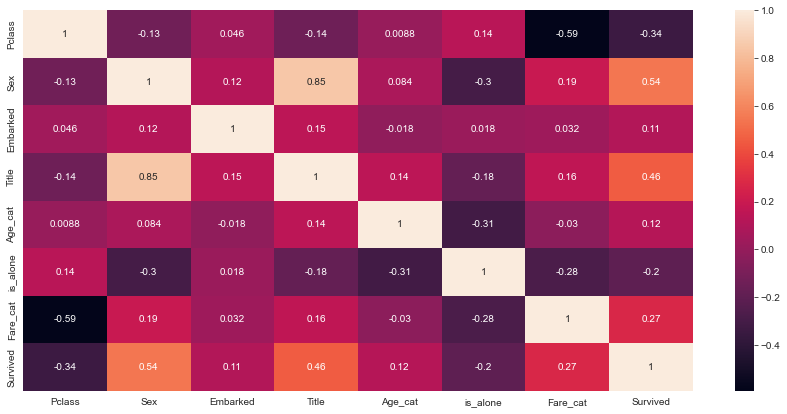

In [63]:
# Plot heatmap to view how correlated the features are with the target feature
train_data_final_1 = train_data_final.copy()
train_data_final_1["Survived"] = target

fig = plt.subplots(figsize = (15, 7))
corr = train_data_final_1.corr()
sns.heatmap(corr, annot = True)

#### Model Building and Evaluation

In [64]:
## Prepare data for feeding into the models
# save target variable in in y
X = train_data_final_1.copy()
y = X.pop("Survived")

In [65]:
# view first 3 rows of y
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [66]:
# view first 3 rows of X
X.head(3)

,Pclass,Sex,Embarked,Title,Age_cat,is_alone,Fare_cat
0,3,0,0,0,0,0,0
1,1,1,1,1,0,0,1
2,3,1,0,2,0,1,0


In [67]:
# Train Logistic Regression, Random Forest, and Decision Tree model
models = {
    "Logistic Regression": LogisticRegression(random_state = 1),
    "Random Forest": RandomForestClassifier(random_state = 1),
    "Decision Tree": DecisionTreeClassifier(random_state = 1),
}

for name, model in models.items():
    model.fit(X, y)
    print(name + " trained")

Logistic Regression trained
Random Forest trained
Decision Tree trained


In [68]:
# store accuracy of each models prediction in results
results = {}
for name, model in models.items():
    result = cross_val_score(model, X, y, cv = 20, scoring = "accuracy")
    results[name] = result

In [69]:
# print mean and standard deviation of the accuracy of the models
for name, result in results.items():
    print("----------\n" + name + "\n----------")
    print(np.mean(result))
    print(np.std(result))

----------
Logistic Regression
----------
0.7743181818181817
0.0431306256302693
----------
Random Forest
----------
0.8091666666666667
0.04786063751566391
----------
Decision Tree
----------
0.8113636363636363
0.04844261102165792


In [70]:
# use grid search to improve RandomForestClassifier model's accuracy by tuning the hyperparameters 
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [71]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [72]:
# build final model with these optimized values 
model_final = RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [73]:
# fit model on X and y
model_final.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [74]:
# store accuracy of each final model's prediction in result
result_final = cross_val_score(model_final, X, y, cv = 20, scoring = "accuracy")

In [75]:
# print mean and standard deviation of the accuracy of the final model
print(np.mean(result_final))
print(np.std(result_final))

0.813560606060606
0.043788279273039535


In [76]:
# view sample of what a submission should look like
submission_example = pd.read_csv("gender_submission.csv")
submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
# use final model to predict on the test data and store predictions in prediction 
prediction = model_final.predict(test_data_final)

In [78]:
# view first 10 predictions
prediction[:11]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [79]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_id, "Survived": prediction}
pred_df = pd.DataFrame(pred_dict)
# view dataframe
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
# convert submission dataframe to .csv format
pred_df.to_csv("submission.csv", index = False)